In [1]:
#import 
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
#set seed 
random.seed(7)
np.random.seed(7)

In [3]:
#init centroid

def get_initial_centroids(X, k):

    number_of_samples = X.shape[0]
    sample_points_ids = random.sample(range(0, number_of_samples), k)

    centroids = [tuple(X[id]) for id in sample_points_ids]
    unique_centroids = list(set(centroids))

    number_of_unique_centroids = len(unique_centroids)

    while number_of_unique_centroids < k:
        new_sample_points_ids = random.sample(range(0, number_of_samples), k - number_of_unique_centroids)
        new_centroids = [tuple(X[id]) for id in new_sample_points_ids]
        unique_centroids = list(set(unique_centroids + new_centroids))

        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

In [4]:
#euclidean distance between  two matrix 

def get_euclidean_distance(A_matrix, B_matrix):

    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T

    C = -2 * AB + B_square + A_square

    return np.sqrt(C)

In [5]:
#init the cluster 

def get_clusters(X, centroids, distance_mesuring_method):
    
    k = centroids.shape[0]

    clusters = {}

    distance_matrix = distance_mesuring_method(X, centroids)

    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    for i in range(k):
        clusters[i] = []

    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(X[i])

    return clusters

In [6]:
#stop k-means

def stop_clustering(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta):

    distances_between_old_and_new_centroids = distance_mesuring_method(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

    return centroids_covered

In [7]:
#Combien all 

def perform_k_means_algorithm(X, k, distance_mesuring_method, movement_threshold_delta=0):

    new_centroids = get_initial_centroids(X=X, k=k)

    centroids_covered = False

    while not centroids_covered:
        previous_centroids = new_centroids
        clusters = get_clusters(X, previous_centroids, distance_mesuring_method)

        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])

        centroids_covered = stop_clustering(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta)

    return new_centroids

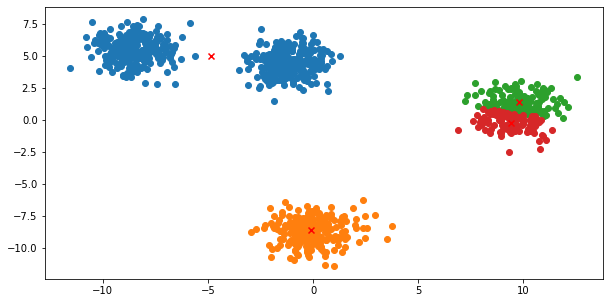

In [8]:
# TEST !!!!! 
k = 4

X, _ = make_blobs(n_samples=1000, n_features=2, centers=k)

centroids = perform_k_means_algorithm(X, k, movement_threshold_delta=1/10, distance_mesuring_method=get_euclidean_distance)

clusters = get_clusters(X, centroids, get_euclidean_distance)

plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)


    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="red")

plt.show()